In [1]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# exercise 1

fox = pd.read_csv('foxes.csv', comment = '#', delimiter = ';', dtype={'group': 'category', 'groupsize': 'int8'})
print(fox['groupsize'].dtypes == 'int8')
print(fox['group'].dtypes == 'category')
fox.head()

True
True


,group,avgfood,groupsize,area,weight
0,1,0.37,2,1.09,5.02
1,1,0.37,2,1.09,2.84
2,2,0.53,2,2.05,5.33
3,2,0.53,2,2.05,6.07
4,3,0.49,2,2.12,5.85


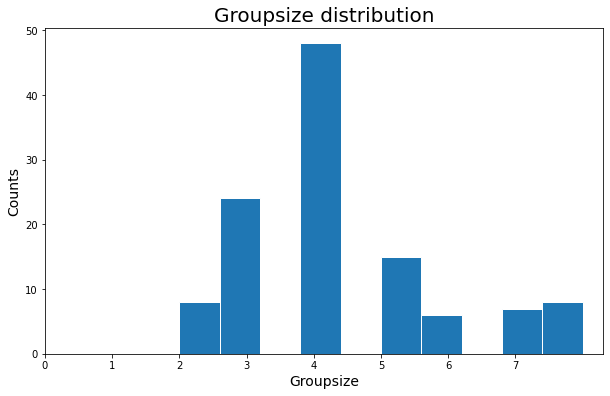

In [3]:
# exercise 2

fig, ax = plt.subplots(figsize = (10, 6))

ax.hist(fox['groupsize'], edgecolor = 'white')

plt.title('Groupsize distribution', fontsize = 20)
plt.xticks(np.arange(0, fox['groupsize'].max(), 1))
plt.xlabel('Groupsize', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.show()

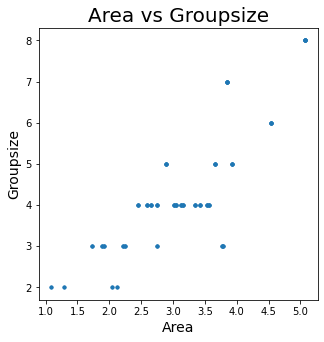

In [4]:
# exercise 3

fig, ax = plt.subplots(figsize = (5, 5))

ax.scatter(fox['area'], fox['groupsize'], marker = '.')

plt.title('Area vs Groupsize', fontsize = 20)
plt.xlabel('Area', fontsize = 14)
plt.ylabel('Groupsize', fontsize = 14)
plt.show()

In [5]:
# exercise 4

def standardize(var: np.typing.NDArray)->np.typing.NDArray:
    """
    >>> standardize([1,-1,0])
    [1.22474487, -1.22474487,  0.]
    
    """
    
    std = (var-var.mean())/var.std()
    
    return std

In [6]:
# exercise 5

def pearson(x: np.ndarray, y: np.ndarray)-> float:
    
    assert len(x) == len(y)
    
    stand_x = standardize(x)
    stand_y = standardize(y)
    
    R_xy = np.mean((stand_x-np.mean(stand_x))*(stand_y-np.mean(stand_y)))/(np.std(stand_x)*np.std(stand_y))
    
    if (R_xy - np.corrcoef(x, y)[0,1]) < 1e-6: 
        return R_xy
    
    return R_xy

In [7]:
# exercise 6

fox['std_area'] = standardize(fox['area'])
fox['std_groupsize'] = standardize(fox['groupsize'])
fox.head()

,group,avgfood,groupsize,area,weight,std_area,std_groupsize
0,1,0.37,2,1.09,5.02,-2.239596,-1.524089
1,1,0.37,2,1.09,2.84,-2.239596,-1.524089
2,2,0.53,2,2.05,5.33,-1.205508,-1.524089
3,2,0.53,2,2.05,6.07,-1.205508,-1.524089
4,3,0.49,2,2.12,5.85,-1.130106,-1.524089


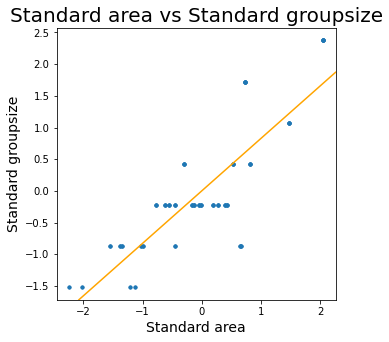

In [14]:
# exercise 7

fig, ax = plt.subplots(figsize = (5, 5))

R_ag = R_ag = pearson(fox['std_area'], fox['std_groupsize'])

ax.scatter(fox['std_area'], fox['std_groupsize'], marker = '.')
plt.axline((0, 0), slope=R_ag, color='orange')
plt.title('Standard area vs Standard groupsize', fontsize = 20)
plt.xlabel('Standard area', fontsize = 14)
plt.ylabel('Standard groupsize', fontsize = 14)
plt.show()

In [19]:
# exercise 8

with pm.Model() as my_est:
    alpha = pm.Normal('alpha', 0, 1)
    groupsize = pm.Normal('groupsize', mu = alpha*fox['std_area'], observed = fox['std_groupsize'])
    post = pm.sample()

C:\Users\chiar\AppData\Local\Temp\ipykernel_3660\3348068880.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  post = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\chiar\.virtualenvs\pyqb-20220208-F1Y8T0ip\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chiar\.virtualenvs\pyqb-20220208-F1Y8T0ip\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chiar\.virtualenvs\pyqb-20220208-F1Y8T0ip\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sa

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 50 seconds.


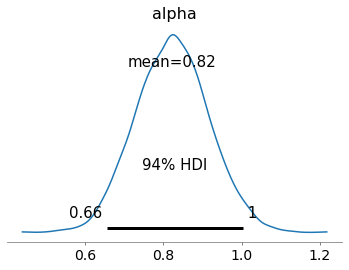

In [20]:
with my_est:
    pm.plot_posterior(post)